## Finding specific variants in each cluster
Using the clones, we want to find variants in each clone that are specific to them.
To define specificity, we will use two parameters: VAF frequency cutoff, and different %of population to have that variant.
These parameters will be used to compare each clone's variants to the population

In [5]:
OUTDIR = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/distinct_variants/donor0"

# DONOR = 0

# pct_thresh = [0.01, 0.5, 0.75, 0.95]
# other_pct_thresh = [0.01, 0.1, 0.25,]
af_thresh = c(0.01, 0.1, 0.4)

In [6]:
library('ComplexHeatmap')
library(dplyr)

In [7]:
read_heat <- function(x){
    name <- paste("params",x,"heatmap_input.tsv",sep = "_")
    print(file.path(OUTDIR,name))
    return(read.table(file.path(OUTDIR,name), header = 1, row.names = 1))
}

read_meta <- function(x){
    name <- paste("params",x,"meta.tsv",sep = "_")
    return(read.table(file.path(OUTDIR,name), header = 1, row.names = 1))
}

mats = lapply(af_thresh, read_heat)
metas = lapply(af_thresh, read_meta)

[1] "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/distinct_variants/donor0/params_0.01_heatmap_input.tsv"
[1] "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/distinct_variants/donor0/params_0.1_heatmap_input.tsv"
[1] "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/distinct_variants/donor0/params_0.4_heatmap_input.tsv"


In [28]:
make.heat <- function(x, meta){
    print(dim(x))
    print(dim(meta))
    return(Heatmap(as.matrix(x), name = "ncells", row_gap = unit(c(6), "mm"), row_split = subset(meta,select=-c(clone, af_thresh))))
}

In [29]:
all.heats <- mapply(function(X,Y) {
              make.heat(X,Y)
              }, X=mats, Y=metas, SIMPLIFY=F)

[1] 195  37
[1] 195   4
[1] 116  37
[1] 116   4
[1] 91 37
[1] 91  4


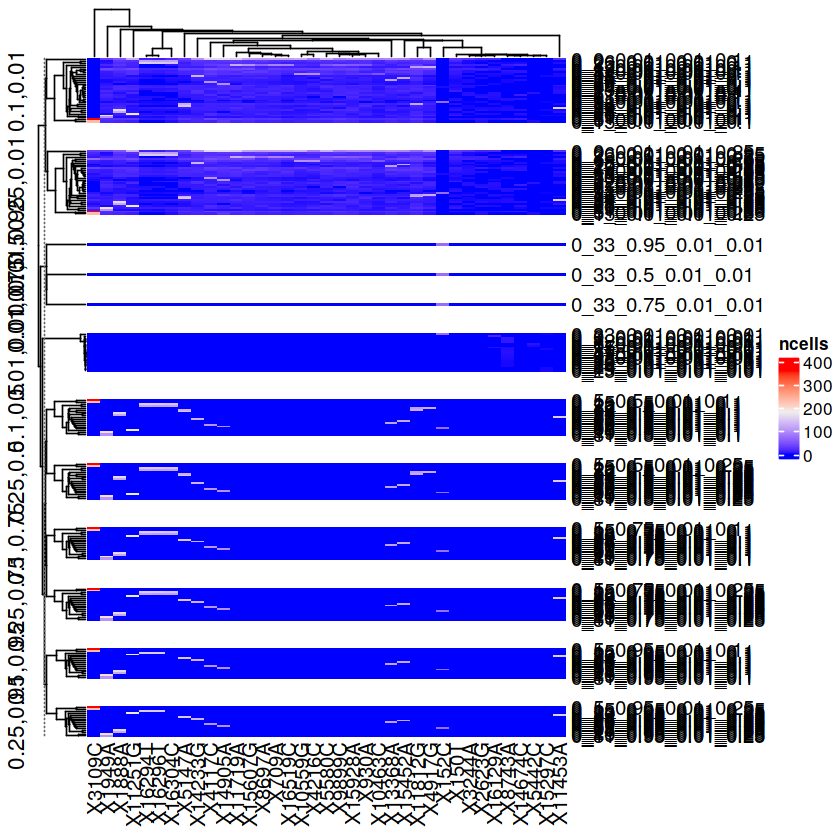

In [31]:
all.heats[[1]]

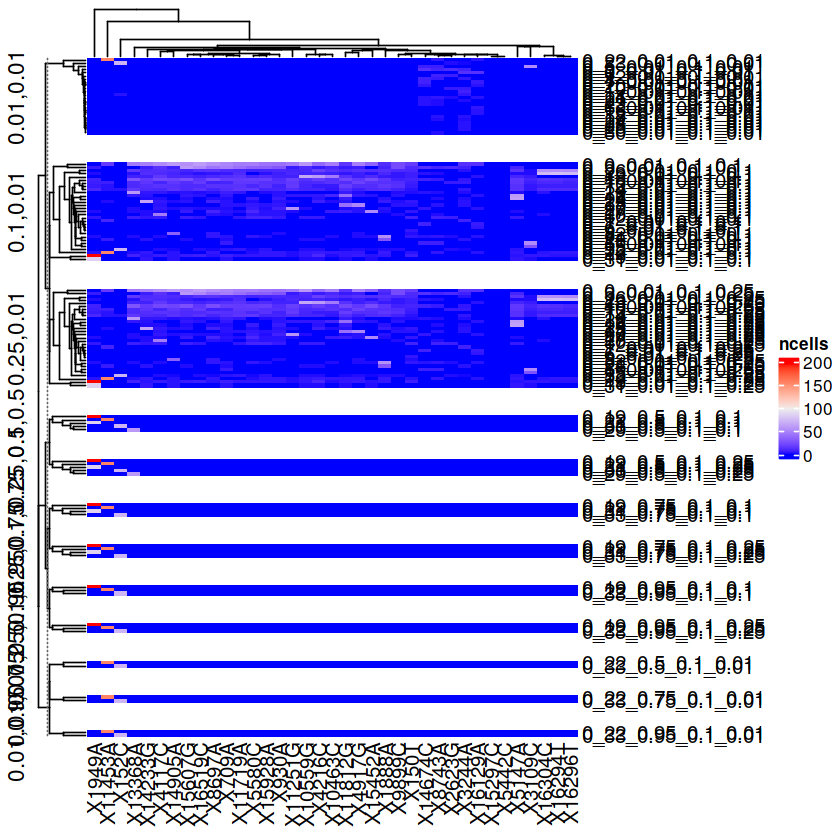

In [32]:
all.heats[[2]]

In [33]:
ggplot_add <- function(object, plot, object_name) {
  UseMethod("ggplot_add")
}
add_ggplot <- function(p, object, objectname) {
  if (is.null(object)) return(p)

  p <- plot_clone(p)
  p <- ggplot_add(object, p, objectname)
  set_last_plot(p)
  p
}



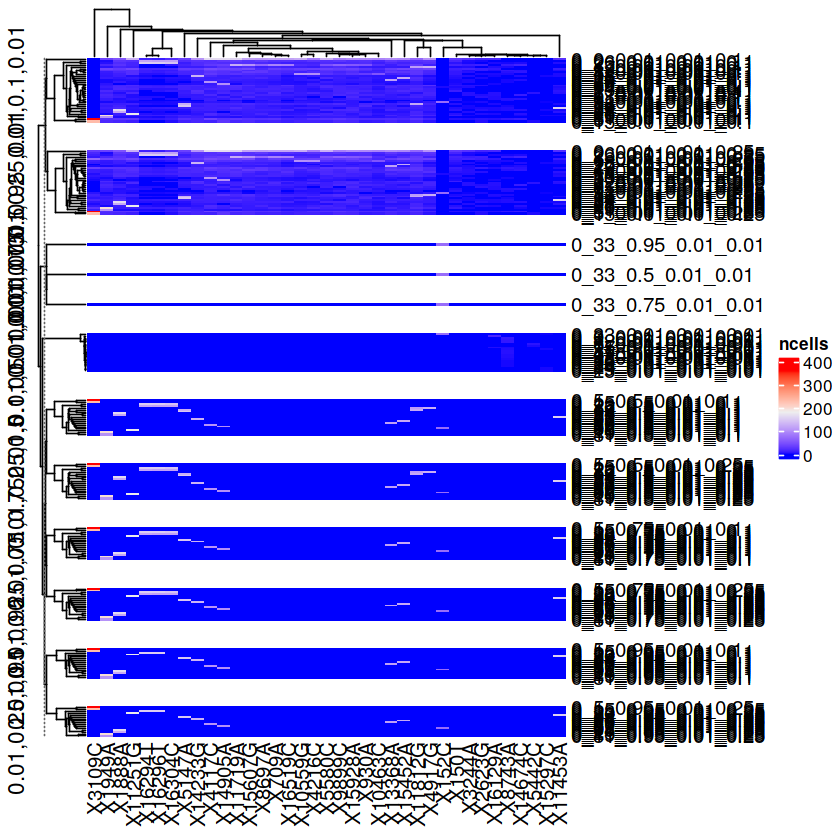

[[1]]

[[2]]

[[3]]


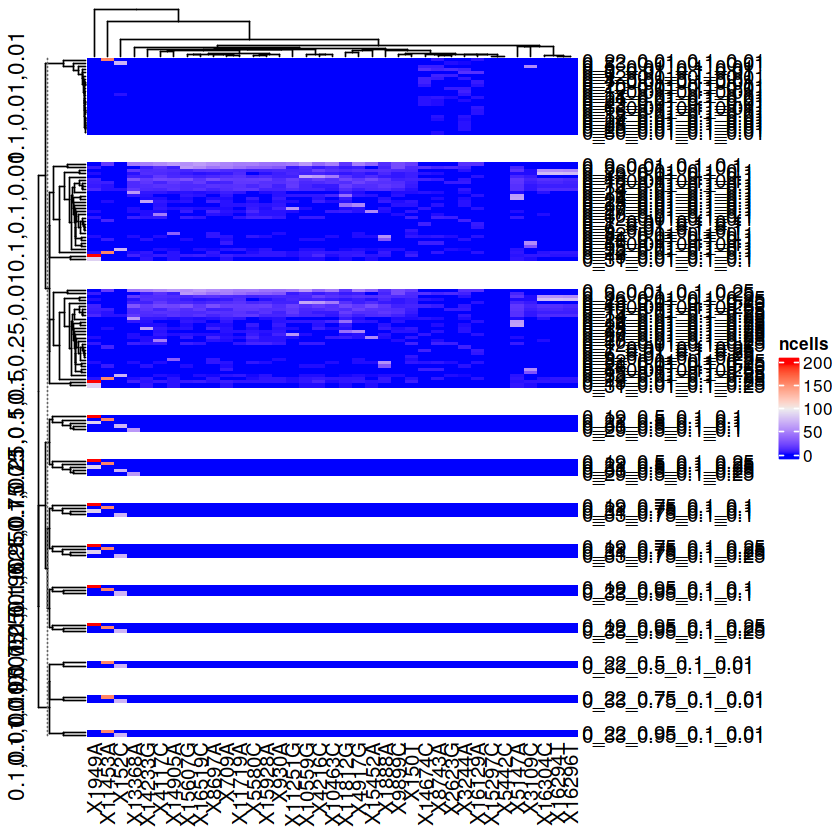

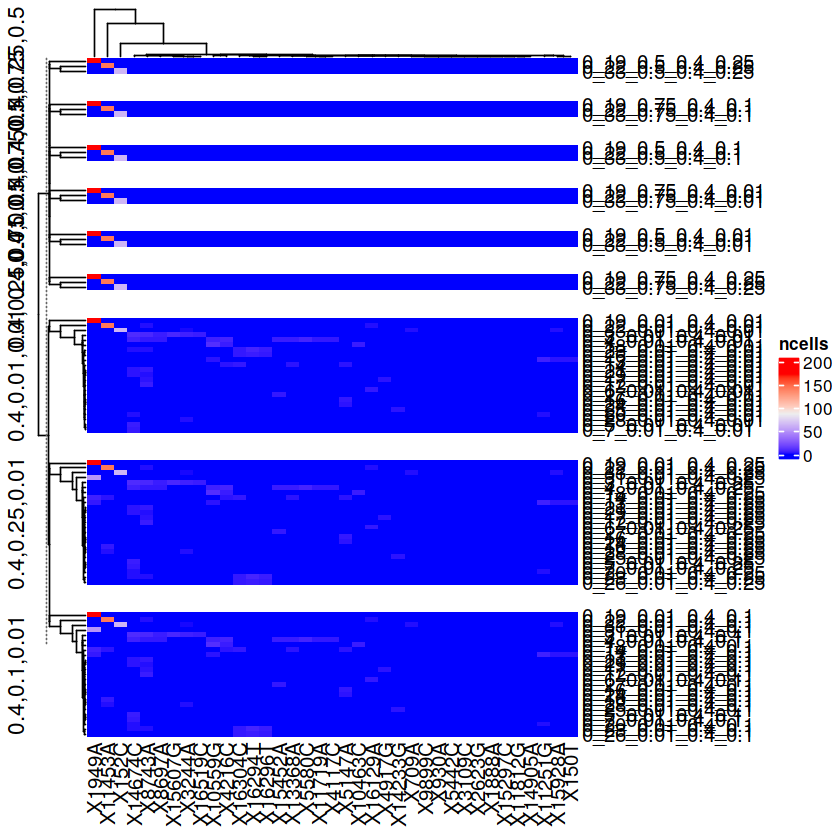

In [15]:
all.heats

In [34]:
add_ggplot(all.heats)

ERROR: Error in add_ggplot(all.heats): argument "object" is missing, with no default


In [ ]:
# ht1 = Heatmap(mat1, name = "rnorm")
# ht2 = Heatmap(mat2, name = "runif")
# ht3 = Heatmap(le, name = "letters")

# ht1 + ht2 + ht3

In [19]:
mats[[2]]

,X10463C,X10559G,X11251G,X11453A,X11719A,X11812G,X13368A,X14233G,X14674C,X14905A,⋯,X4216C,X4917G,X5147A,X5442C,X5580C,X709A,X8697A,X8743A,X930A,X9899C
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0_0_0.01_0_0.01,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0_11_0.01_0_0.01,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,5,0,0
0_12_0.01_0_0.01,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,8,0,0
0_15_0.01_0_0.01,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,3,0,0,0,0,0,0
0_17_0.01_0_0.01,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,3,0,0
0_18_0.01_0_0.01,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,3,0,0
0_19_0.01_0_0.01,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0_21_0.01_0_0.01,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,4,0,0
0_22_0.01_0_0.01,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,4,0,0


In [8]:
mat <- read.table(file.path(OUTDIR,"params_heatmap_input.tsv"), header = 1, row.names = 1)
mat

meta <- read.table(file.path(OUTDIR,"params_meta.tsv"), header = 1, row.names = 1, colClasses='character')
meta

Heatmap(as.matrix(mat), name = "ncells", row_gap = unit(c(6), "mm"), row_split = subset(meta,select=-c(clone)))

,X10463C,X10559G,X11251G,X11453A,X11719A,X11812G,X13368A,X14233G,X14674C,X14905A,⋯,X4216C,X4917G,X5147A,X5442C,X5580C,X709A,X8697A,X8743A,X930A,X9899C
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0_0_0.01_0_0.01,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0_11_0.01_0_0.01,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,5,0,0
0_12_0.01_0_0.01,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,8,0,0
0_15_0.01_0_0.01,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,3,0,0,0,0,0,0
0_17_0.01_0_0.01,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,3,0,0
0_18_0.01_0_0.01,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,3,0,0
0_19_0.01_0_0.01,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0_21_0.01_0_0.01,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,4,0,0
0_22_0.01_0_0.01,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,4,0,0


The automatically generated colors map from the 1^st and 99^th of the
values in the matrix. There are outliers in the matrix whose patterns
might be hidden by this color mapping. You can manually set the color
to `col` argument.

Use `suppressMessages()` to turn off this message.



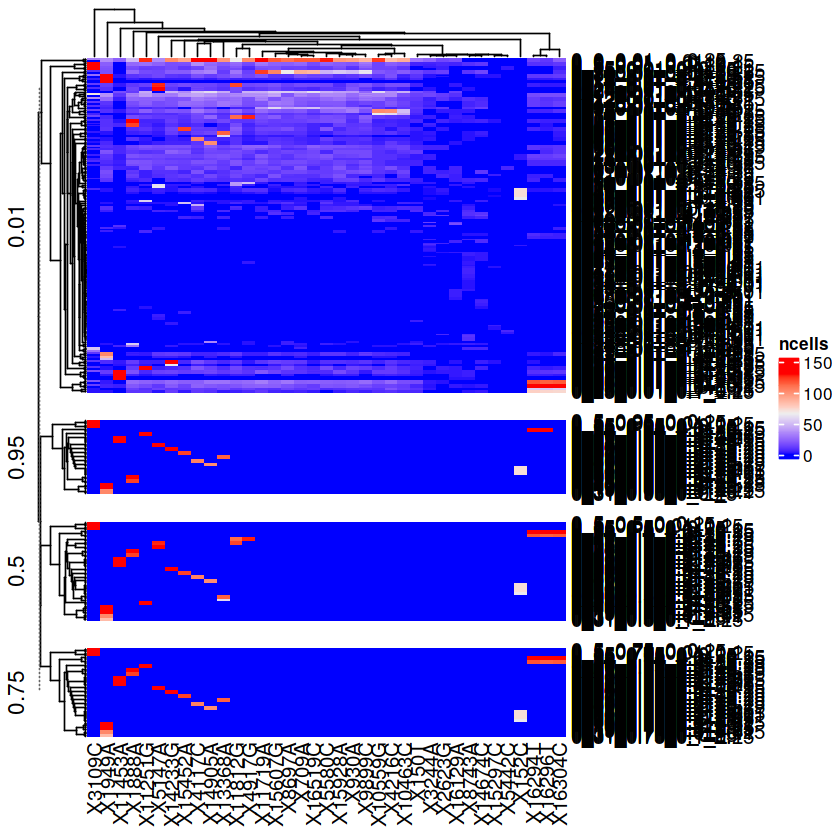

In [34]:
Heatmap(as.matrix(mat), name = "ncells", row_gap = unit(c(6), "mm"), row_split = meta[c("pct_thresh")])

The automatically generated colors map from the 1^st and 99^th of the
values in the matrix. There are outliers in the matrix whose patterns
might be hidden by this color mapping. You can manually set the color
to `col` argument.

Use `suppressMessages()` to turn off this message.



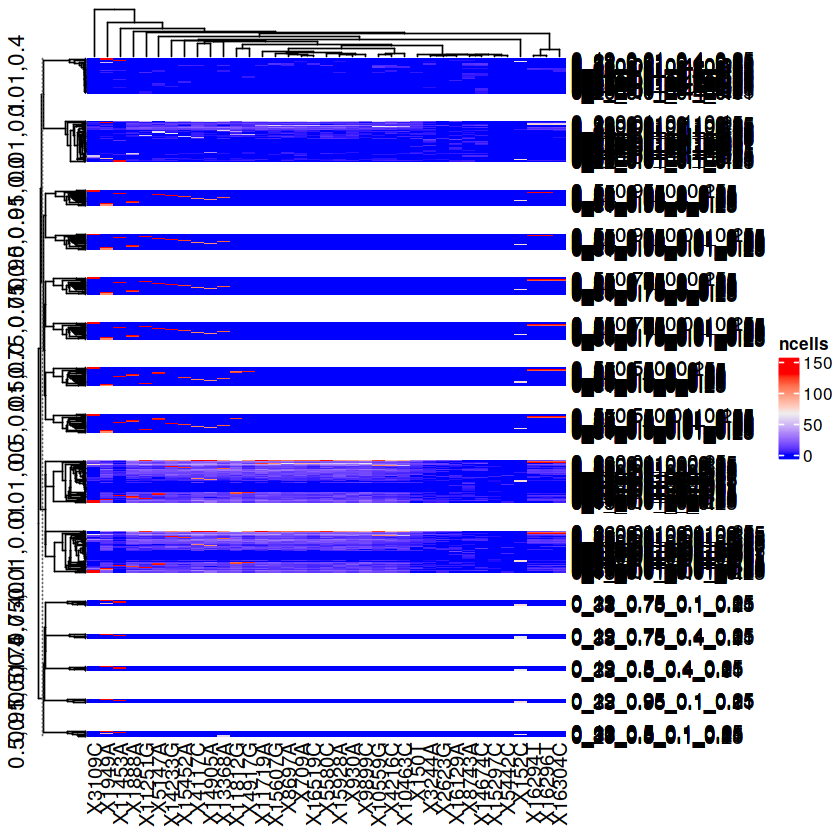

In [40]:
ht = Heatmap(as.matrix(mat), name = "ncells", row_gap = unit(c(6), "mm"), row_split = meta[c("pct_thresh", "af_thresh")],
            row_title_rot=90)
draw(ht)

The automatically generated colors map from the 1^st and 99^th of the
values in the matrix. There are outliers in the matrix whose patterns
might be hidden by this color mapping. You can manually set the color
to `col` argument.

Use `suppressMessages()` to turn off this message.



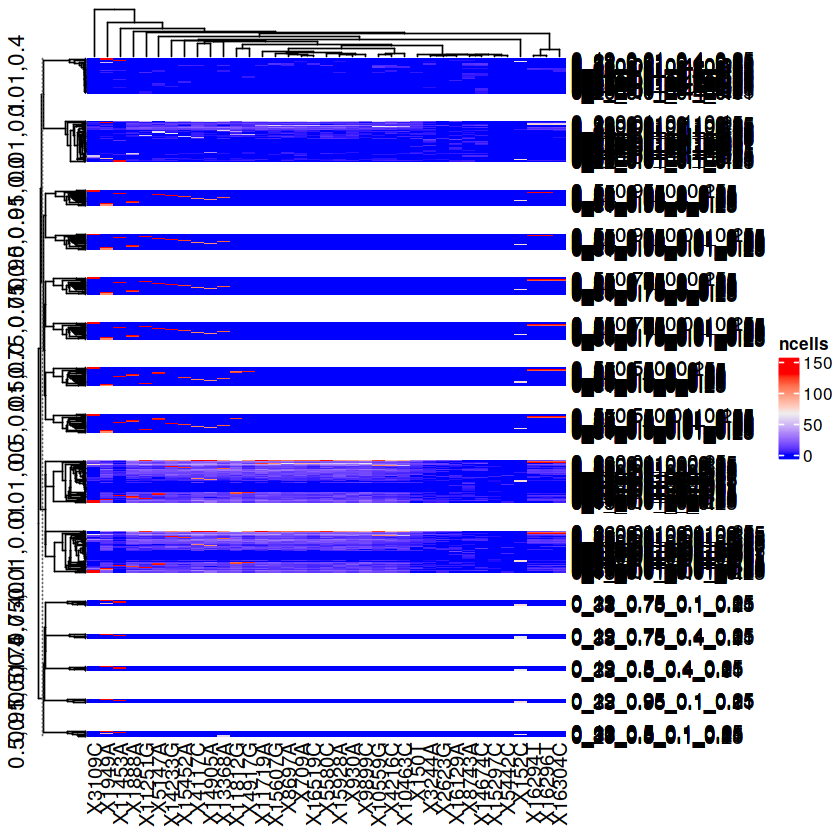

In [33]:
Heatmap(as.matrix(mat), name = "ncells", row_gap = unit(c(6), "mm"), row_split = meta[c("pct_thresh", "af_thresh")])

## Create input for ComplexHeatmap (used in R)

Save the matrix as a tsv file where each row is a clone-parameter combination, each column is the variant, and the value is n_cells.
Save the metadata as a tsv file with the same rows annd the columns are the parameters 'af_thresh', 'pct_thresh', 'other_pct_thresh'

In [46]:
heatmap_input = all_df[["n_cells", "variant"]].reset_index().pivot(index="id", columns="variant", values="n_cells").fillna(0).astype(int)
print(heatmap_input.shape)

meta_df = all_df[["af_thresh", "other_pct_thresh", "pct_thresh", "clone"]]
print(meta_df.shape)
meta_df = meta_df.loc[~(meta_df.index.duplicated())] #drop_duplicates()
print(meta_df.shape)

meta_df = meta_df.sort_values(["af_thresh","pct_thresh", "other_pct_thresh", "clone"])
heatmap_input = heatmap_input.loc[meta_df.index]

heatmap_input.to_csv(join(OUTDIR, "params_heatmap_input.tsv"),sep="\t")
meta_df.to_csv(join(OUTDIR, "params_meta.tsv"), sep="\t")

(598, 37)
(5553, 4)
(598, 4)
